## 1. Data processing
Những thông tin chúng ta có thể khai thác được:
- ảnh
- text
- audio

Những thông tin tạo ra được:
- OCR
- Object Name (Object Detection)
- Place (Place Recognition: bãi biển, rừng, sân vận động) => VLM lấy ra
- THời tiết (VLM lấy)
- ....
## Model
- CLIP
- EMbedding Ảnh
- Ebmedding Text (OCR, Object name, place,...) + Ảnh

## Faiss
- Thay đổi thuật toán tương đồng (đang mặc định cosine,....)


In [5]:
!pip install gdown

In [6]:
import gdown

In [7]:
downloaded_zip_folder = '/content/drive_downloaded_files'

In [8]:
gdown.download_folder('https://drive.google.com/drive/folders/1ugJdQsGLZfuQUr6uUZ1xjTEahMR7_qpM', output=downloaded_zip_folder, quiet=False)

Retrieving folder contents


Processing file 1g6DrGPwI1E1FiVTklOeJyBmZOtWJ9VI4 L01_V001.zip
Processing file 1et15-nQeiH6zYkrlxFapZNLTnp9KFo5y L01_V002.zip
Processing file 155nGLQZsX1h-lgdzV66u0f6gJwq1ah3x L01_V003.zip
Processing file 1ygmTIudkrXjCR1JH8SGx5mQU5KapKq2p L01_V004.zip
Processing file 11mMph0wSE6PwI7n_t8iV8HoRdc-ZerGD L01_V005.zip
Processing file 1pPfyAPFNZ1yZU2KWHJSqTSdD5xsP3GiE L01_V006.zip
Processing file 1xVk3EtZBvUyUqdUd3QlA5HCHqzci9uEW L01_V007.zip
Processing file 1TZDwlwGsIVRIdrld1o7yeV1EEhRK6K_V L01_V008.zip
Processing file 1S7sGGZsccNnF7SNrAh6PN6NoDImQo1Lk L01_V009.zip
Processing file 1Jbos8_VmH8gn4E-0IpWH7jHLhSfncpgT L01_V010.zip
Processing file 1B8ug_xOcO3korAYOrt5I0DQkqL-Md-z1 L01_V011.zip
Processing file 1GvhVzaze_S2g3YJ9JsYaPM5C3YTVi_Dj L01_V012.zip
Processing file 1GhMK-BaF_8t7dkMyrHbmjVGlnLKSCsQq L01_V013.zip
Processing file 175MNeOsSE52dVAXleUGmbfgo9uso2MP6 L01_V014.zip
Processing file 1cgeMDOolfa9qMu7M9CmII-xe-gg7MGNM L01_V015.zip
Processing file 1tEeZsWLj8dpWleW_Jp8ndgAKa0pPh1Vp L01_V

Retrieving folder contents completed
Building directory structure
Building directory structure completed
Downloading...
From (original): https://drive.google.com/uc?id=1g6DrGPwI1E1FiVTklOeJyBmZOtWJ9VI4
From (redirected): https://drive.google.com/uc?id=1g6DrGPwI1E1FiVTklOeJyBmZOtWJ9VI4&confirm=t&uuid=044cb0c7-5d27-44fa-869d-e3e9cb8e250f
To: /content/drive_downloaded_files/L01_V001.zip
100%|██████████| 174M/174M [00:03<00:00, 57.2MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=1et15-nQeiH6zYkrlxFapZNLTnp9KFo5y
From (redirected): https://drive.google.com/uc?id=1et15-nQeiH6zYkrlxFapZNLTnp9KFo5y&confirm=t&uuid=9d3e9a35-6d51-419d-b459-de4e9a9fc563
To: /content/drive_downloaded_files/L01_V002.zip
100%|██████████| 146M/146M [00:02<00:00, 56.5MB/s]
Downloading...
From (original): https://drive.google.com/uc?id=155nGLQZsX1h-lgdzV66u0f6gJwq1ah3x
From (redirected): https://drive.google.com/uc?id=155nGLQZsX1h-lgdzV66u0f6gJwq1ah3x&confirm=t&uuid=73ef0958-ea7f-4315-999e-358124e36

['/content/drive_downloaded_files/L01_V001.zip',
 '/content/drive_downloaded_files/L01_V002.zip',
 '/content/drive_downloaded_files/L01_V003.zip',
 '/content/drive_downloaded_files/L01_V004.zip',
 '/content/drive_downloaded_files/L01_V005.zip',
 '/content/drive_downloaded_files/L01_V006.zip',
 '/content/drive_downloaded_files/L01_V007.zip',
 '/content/drive_downloaded_files/L01_V008.zip',
 '/content/drive_downloaded_files/L01_V009.zip',
 '/content/drive_downloaded_files/L01_V010.zip',
 '/content/drive_downloaded_files/L01_V011.zip',
 '/content/drive_downloaded_files/L01_V012.zip',
 '/content/drive_downloaded_files/L01_V013.zip',
 '/content/drive_downloaded_files/L01_V014.zip',
 '/content/drive_downloaded_files/L01_V015.zip',
 '/content/drive_downloaded_files/L01_V016.zip',
 '/content/drive_downloaded_files/L01_V017.zip',
 '/content/drive_downloaded_files/L01_V018.zip',
 '/content/drive_downloaded_files/L01_V019.zip',
 '/content/drive_downloaded_files/L01_V020.zip',
 '/content/drive_dow

In [10]:
import os
import zipfile

In [11]:
# Tạo thư mục 'images'
output_dir = '/content/images'
if not os.path.exists(output_dir):
    os.makedirs(output_dir)


In [12]:
# Lặp qua từng file trong thư mục
for file_name in os.listdir(downloaded_zip_folder):
    if file_name.endswith('.zip'):
        file_path = os.path.join(downloaded_zip_folder, file_name)
        with zipfile.ZipFile(file_path, 'r') as zip_ref:
            zip_ref.extractall(output_dir)


In [13]:
# Thư mục chứa ảnh đã giải nén
image_dir = '/content/images'

# Đếm số lượng file ảnh trong thư mục
image_extensions = ('.jpg', '.jpeg', '.png', '.gif', '.bmp', '.tiff', '.svg')  # Các định dạng ảnh phổ biến
image_files = [f for f in os.listdir(image_dir) if f.lower().endswith(image_extensions)]

# Hiển thị số lượng file ảnh
print(f"Số lượng file ảnh trong thư mục 'images': {len(image_files)}")


Số lượng file ảnh trong thư mục 'images': 27089


In [14]:
!pip install -q faiss-cpu
!pip install -q git+https://github.com/openai/CLIP.git

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.0/27.0 MB 47.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.0/43.0 kB 2.3 MB/s eta 0:00:00


In [15]:
!pip install -q translate
!pip install -q underthesea==1.3.5a3
!pip install -q underthesea[deep]
!pip install -q pyvi
!pip install -q langdetect
!pip install -q googletrans==3.1.0a0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.0/11.0 MB 57.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 591.2/591.2 kB 31.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.5/235.5 kB 14.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.5/8.5 MB 40.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 4.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/

In [16]:
import os
import torch
import clip
from PIL import Image
import faiss
import numpy as np
import json
import matplotlib.pyplot as plt
import math
import googletrans
import translate
import glob
import underthesea
import zipfile
from pyvi import ViUtils, ViTokenizer
from difflib import SequenceMatcher
from langdetect import detect

In [17]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
features = []
id2img_fps = {}
list_image = glob.glob("images/*jpg")

# Đọc ảnh trong folder => CLIP => Embedding
for id, image_path in enumerate(list_image):
  id2img_fps[id] = image_path
  image = preprocess(Image.open(image_path)).unsqueeze(0).to(device)
  with torch.no_grad():
      image_features = model.encode_image(image).detach().cpu().numpy() # Lấy image embedding
      features.append(image_features) # Lưu embedding vào list

image_embeddings = np.concatenate(features) # list embedding

with open('image_path.json', 'w') as f:
  f.write(json.dumps(id2img_fps))

100%|████████████████████████████████████████| 338M/338M [00:01<00:00, 186MiB/s]


In [18]:
# indexing
index = faiss.IndexFlatIP(image_embeddings.shape[1]) # method cosine: IndexFlatIP
index.add(image_embeddings)

In [19]:
a = faiss.write_index(index, 'faiss_normal_ViT.bin')

In [20]:
class Translation():
    def __init__(self, from_lang='vi', to_lang='en', mode='google'):
        # The class Translation is a wrapper for the two translation libraries, googletrans and translate.
        self.__mode = mode
        self.__from_lang = from_lang
        self.__to_lang = to_lang

        if mode in 'googletrans':
            self.translator = googletrans.Translator()
        elif mode in 'translate':
            self.translator = translate.Translator(from_lang=from_lang,to_lang=to_lang)

    def preprocessing(self, text):

        return text.lower()

    def __call__(self, text):

        text = self.preprocessing(text)
        return self.translator.translate(text) if self.__mode in 'translate' \
                else self.translator.translate(text, dest=self.__to_lang).text

class Text_Preprocessing():
    def __init__(self, stopwords_path='./dict/vietnamese-stopwords-dash.txt'):
        with open(stopwords_path, 'rb') as f:
            lines = f.readlines()
        self.stop_words = [line.decode('utf8').replace('\n','') for line in lines]

    def find_substring(self, string1, string2):

        match = SequenceMatcher(None, string1, string2, autojunk=False).find_longest_match(0, len(string1), 0, len(string2))
        return string1[match.a:match.a + match.size].strip()

    def remove_stopwords(self, text):

        text = ViTokenizer.tokenize(text)
        return " ".join([w for w in text.split() if w not in self.stop_words])

    def lowercasing(self, text):
        return text.lower()

    def uppercasing(self, text):
        return text.upper()

    def add_accents(self, text):

        return ViUtils.add_accents(u"{}".format(text))

    def remove_accents(self, text):

        return ViUtils.remove_accents(u"{}".format(text))

    def sentence_segment(self, text):

        return underthesea.sent_tokenize(text)

    def text_norm(self, text):

        return underthesea.text_normalize(text)

    def text_classify(self, text):

        return underthesea.classify(text)

    def sentiment_analysis(self, text):

        return underthesea.sentiment(text)

    def __call__(self, text):

        text = self.lowercasing(text)
        text = self.remove_stopwords(text)
        # text = self.remove_accents(text)
        # text = self.add_accents(text)
        text = self.text_norm(text)
        categories = self.text_classify(text)
        return categories


In [21]:
class Myfaiss:
    def __init__(self, bin_file : str,id2img_fps, device, model):
        self.index= self.load_bin_file(bin_file)
        self.id2img_fps= id2img_fps
        self.device= device
        self.model= model

    def load_bin_file(self, bin_file: str):
        return faiss.read_index(bin_file)


    def show_images(self, image_paths):
        fig = plt.figure(figsize=(15, 10))
        columns = int(math.sqrt(len(image_paths)))
        rows = int(np.ceil(len(image_paths)/columns))

        for i in range(1, columns*rows +1):
          img = plt.imread(image_paths[i - 1])
          ax = fig.add_subplot(rows, columns, i)
          ax.set_title('/'.join(image_paths[i - 1].split('/')[-3:]))

          plt.imshow(img)
          plt.axis("off")

        plt.show()

    def image_search(self, id_query, k, bin_file):

        query_feats = self.index.reconstruct(id_query).reshape(1,-1)

        scores, idx_image = self.index.search(query_feats, k=k)
        idx_image = idx_image.flatten()

        infos_query = list(map(self.id2img_fps.get, list(idx_image)))
        image_paths = [info for info in infos_query]


        return scores, idx_image, infos_query, image_paths

    def text_search(self, text, k):
        translater= Translation()
        if detect(text) == 'vi':
            text = translater(text)

        ###### TEXT FEATURES EXACTING ######
        text = clip.tokenize([text]).to(device)
        text_features = model.encode_text(text).cpu().detach().numpy().astype(np.float32)

        ###### SEARCHING #####
        scores, idx_image = self.index.search(text_features, k=k)
        idx_image = idx_image.flatten()

        ###### GET INFOS KEYFRAMES_ID ######
        infos_query = list(map(self.id2img_fps.get, list(idx_image)))
        image_paths = [info for info in infos_query]

        return scores, idx_image, infos_query, image_paths

In [22]:
bin_file='faiss_normal_ViT.bin'
faiss_test= Myfaiss(bin_file, id2img_fps, device, model)

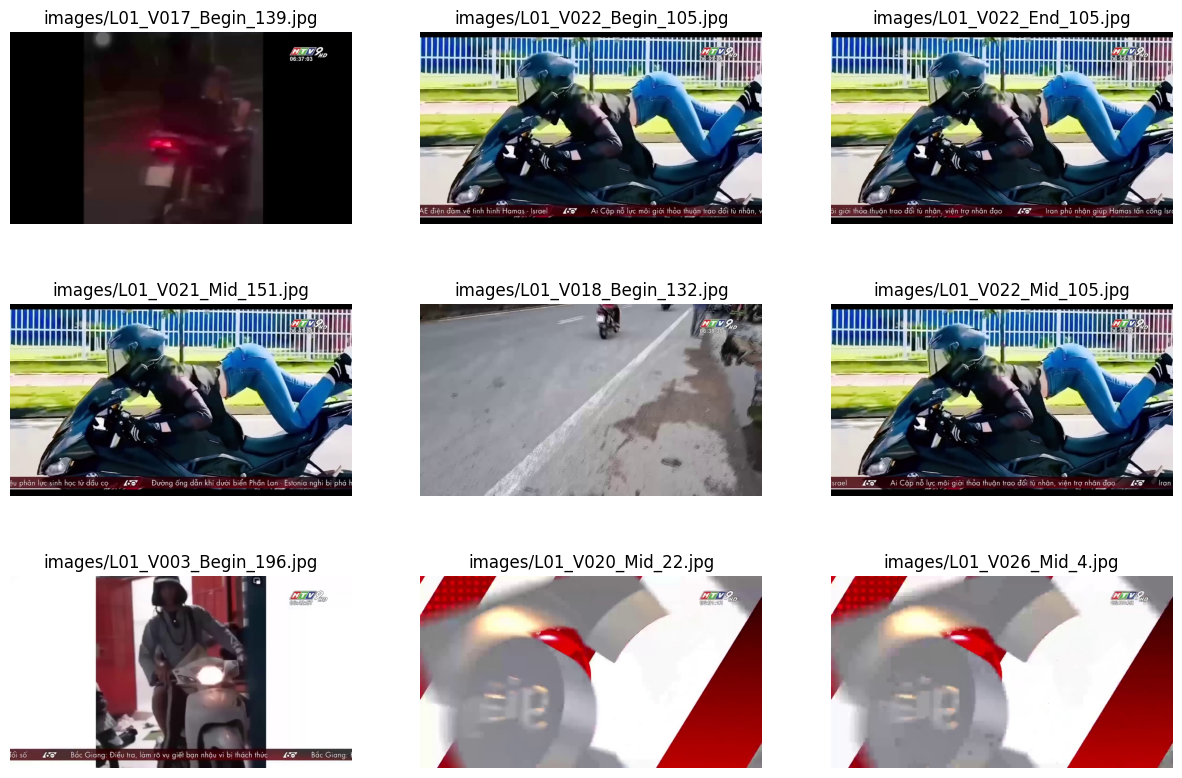

In [28]:
text = 'xe máy'

scores, idx_image, infos_query, image_paths = faiss_test.text_search(text, k=9)
faiss_test.show_images(image_paths)